In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder


# Importing Data for training 
## Checking the data type of each columns 

In [2]:
Data=pd.read_csv('/Users/alok.g.v/Desktop/project/Loan Prediction analytic vidhya /train_ctrUa4K.csv')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## We can see that Dependents can be converted to int for model buliding .


In [3]:
columns=Data.columns
for i in columns:
    print(f'The number of null values in {i} : ',Data[i].isna().sum())
    
    

The number of null values in Loan_ID :  0
The number of null values in Gender :  13
The number of null values in Married :  3
The number of null values in Dependents :  15
The number of null values in Education :  0
The number of null values in Self_Employed :  32
The number of null values in ApplicantIncome :  0
The number of null values in CoapplicantIncome :  0
The number of null values in LoanAmount :  22
The number of null values in Loan_Amount_Term :  14
The number of null values in Credit_History :  50
The number of null values in Property_Area :  0
The number of null values in Loan_Status :  0


In [4]:
Obj_cols=Data.select_dtypes(include=['object']).columns
num_cols=Data.select_dtypes(include=['int64','float64']).columns


In [5]:
for i in Obj_cols:
    print(f'The Distribution of {i} :\n\n')
    print(Data[i].value_counts())
    print('\n\n')

The Distribution of Loan_ID :


LP002524    1
LP002377    1
LP002478    1
LP002933    1
LP001469    1
           ..
LP001497    1
LP001872    1
LP001849    1
LP001917    1
LP002398    1
Name: Loan_ID, Length: 614, dtype: int64



The Distribution of Gender :


Male      489
Female    112
Name: Gender, dtype: int64



The Distribution of Married :


Yes    398
No     213
Name: Married, dtype: int64



The Distribution of Dependents :


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64



The Distribution of Education :


Graduate        480
Not Graduate    134
Name: Education, dtype: int64



The Distribution of Self_Employed :


No     500
Yes     82
Name: Self_Employed, dtype: int64



The Distribution of Property_Area :


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64



The Distribution of Loan_Status :


Y    422
N    192
Name: Loan_Status, dtype: int64





In [6]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

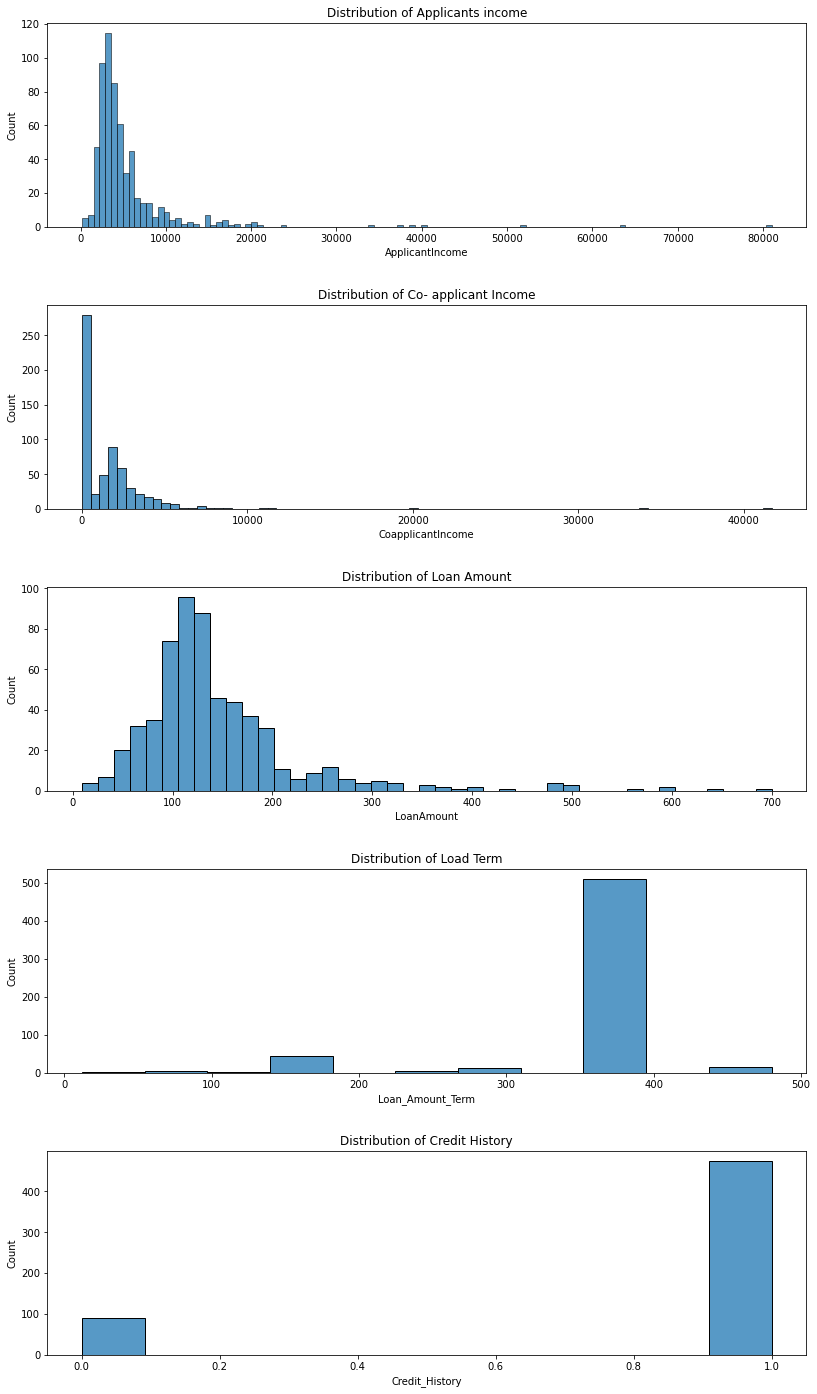

In [7]:
fig,axe=plt.subplots(5,1,figsize=(12,20))
sns.histplot(data=Data,x='ApplicantIncome',ax=axe[0])
axe[0].set_title('Distribution of Applicants income')
sns.histplot(data=Data,x='CoapplicantIncome',ax=axe[1])
axe[1].set_title('Distribution of Co- applicant Income')
sns.histplot(data=Data,x='LoanAmount',ax=axe[2])
axe[2].set_title('Distribution of Loan Amount')
sns.histplot(data=Data,x='Loan_Amount_Term',ax=axe[3])
axe[3].set_title('Distribution of Load Term')
sns.histplot(data=Data,x='Credit_History',ax=axe[4])
axe[4].set_title('Distribution of Credit History')



fig.tight_layout(pad=3.0)







## From the distribution of data we can replace the missing values with the most common or majority of each column.
### The number of null values in Gender is 13,We can replace the missing null values as Male as its the majority.
### The number of null values in Married is 3,We can replace the missing null values as Yes as its the majority.
### The number of null values in Dependents is 15,We can replace the missing null values as 0 as its the majority.
### The number of null values in Self_Employed is 32,We can replace the missing null values as No as its the majority.
### The number of null values in Loan_Amount_Term is 14,We can replace the missing null values as 360 as its the majority.
### The number of null values in Credit_History is 50,We can replace the missing null values as 1 as its the majority

In [8]:
Data['Gender'].replace([np.nan],'Male',inplace=True)
Data['Married'].replace([np.nan],'Yes',inplace=True)
Data['Dependents'].replace([np.nan],'0',inplace=True)
Data['Dependents'].replace(['3+'],'3',inplace=True)
Data['Self_Employed'].replace([np.nan],'No',inplace=True)
Data['Loan_Amount_Term'].replace([np.nan],360,inplace=True)
Data['Credit_History'].replace([np.nan],1,inplace=True)


In [9]:
Data['Dependents']= Data['Dependents'].astype(int)



# Finding the missing Load Amounts Accurately 

In [10]:
# KNN Regressor can be used to find the Loan Amount more accurately 

from sklearn.neighbors import KNeighborsRegressor

LA_Data=Data[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Dependents','LoanAmount']]
LA_Data_train=LA_Data[LA_Data['LoanAmount'].isnull()==False]
LA_Data_test=LA_Data[LA_Data['LoanAmount'].isnull()==True]
x_train=LA_Data_train.drop("LoanAmount",axis=1)
y_train=LA_Data_train.LoanAmount
x_test=LA_Data_test.drop("LoanAmount",axis=1)

KNN=KNeighborsRegressor(n_neighbors=4)

KNN=KNN.fit(x_train,y_train)

y_test=KNN.predict(x_test)

LA_Data_test["LoanAmount"]=y_test

LA_Data_test



<ipython-input-10-af950028c456>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA_Data_test["LoanAmount"]=y_test


,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Dependents,LoanAmount
0,5849,0.0,360.0,1.0,0,151.50
35,2275,2067.0,360.0,1.0,0,96.75
63,4945,0.0,360.0,0.0,1,137.25
81,2395,0.0,360.0,1.0,1,51.25
95,6782,0.0,360.0,1.0,0,169.00
102,13650,0.0,360.0,1.0,0,266.50
103,4652,3583.0,360.0,1.0,0,180.25
113,7451,0.0,360.0,1.0,1,151.25
127,3865,1640.0,360.0,1.0,0,125.75
202,3992,0.0,180.0,1.0,3,82.50


In [11]:
#replacing the null values with the values predicted by our KNN Model


repl=LA_Data_test.index
i=0
for x in repl:
    Data['LoanAmount'].loc[x]=y_test[i]
    i+=1

Data['LoanAmount'].isnull().sum()

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

# OneHotEncoding and Label Encoding of the categorical data


### Using dummie columns 


In [12]:
Gender=pd.get_dummies(Data['Gender'])
Married=pd.get_dummies(Data['Married'])
Education=pd.get_dummies(Data['Education'])
Self_Employed=pd.get_dummies(Data['Self_Employed'])
Property_Area=pd.get_dummies(Data['Property_Area'])


"dum=pd.get_dummies(data=Data,columns=['Gender','Married','Education','Self_Employed','Property_Area'])\n\ndum"

In [13]:
Le=LabelEncoder()
Data['Loan_Status']=Le.fit_transform(Data['Loan_Status'])


In [14]:
X=Data[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
X=pd.concat([X,Gender,Married,Education,Self_Employed,Property_Area],axis=1)
y=Data['Loan_Status']


# Spliting the Data into train and test sets

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=(0.2))


# Logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model=LogisticRegression()
pipe=make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)


In [17]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8617886178861789


# Hyperperameter Tuning using GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [34]:
LR=LogisticRegression()
clf=GridSearchCV(LR,param_grid=param_grid,cv = 3,verbose=True,n_jobs=-1)

In [35]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.67616839 ...        nan 0.67209088 0.67209088]
  warnings.warn(


In [36]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='newton-cg')

In [37]:
model=LogisticRegression()
pipe=make_pipeline(StandardScaler(), LogisticRegression(C=0.23357214690901212, solver='newton-cg'))
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8617886178861789


# Test File

In [39]:
Data_test=pd.read_csv('/Users/alok.g.v/Desktop/project/Loan Prediction analytic vidhya /test_lAUu6dG.csv')
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [42]:
columns=Data_test.columns
for i in columns:
    print(f'The number of null values in {i} : ',Data_test[i].isna().sum())

The number of null values in Loan_ID :  0
The number of null values in Gender :  11
The number of null values in Married :  0
The number of null values in Dependents :  10
The number of null values in Education :  0
The number of null values in Self_Employed :  23
The number of null values in ApplicantIncome :  0
The number of null values in CoapplicantIncome :  0
The number of null values in LoanAmount :  5
The number of null values in Loan_Amount_Term :  6
The number of null values in Credit_History :  29
The number of null values in Property_Area :  0


In [44]:
Data_test['Gender'].replace([np.nan],'Male',inplace=True)
Data_test['Dependents'].replace([np.nan],'0',inplace=True)
Data_test['Dependents'].replace(['3+'],'3',inplace=True)
Data_test['Self_Employed'].replace([np.nan],'No',inplace=True)
Data_test['Loan_Amount_Term'].replace([np.nan],360,inplace=True)
Data_test['Credit_History'].replace([np.nan],1,inplace=True)
Data['Dependents']= Data['Dependents'].astype(int)




In [45]:
LA_Data=Data_test[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Dependents','LoanAmount']]
LA_Data_train=LA_Data[LA_Data['LoanAmount'].isnull()==False]
LA_Data_test=LA_Data[LA_Data['LoanAmount'].isnull()==True]
x_train=LA_Data_train.drop("LoanAmount",axis=1)
y_train=LA_Data_train.LoanAmount
x_test=LA_Data_test.drop("LoanAmount",axis=1)

KNN=KNeighborsRegressor(n_neighbors=4)

KNN=KNN.fit(x_train,y_train)

y_test=KNN.predict(x_test)

LA_Data_test["LoanAmount"]=y_test

LA_Data_test



<ipython-input-45-da2a0c395dcc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA_Data_test["LoanAmount"]=y_test


,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Dependents,LoanAmount
78,3413,4053,360.0,1.0,1,182.00
101,2262,0,480.0,0.0,0,82.50
188,13083,0,360.0,1.0,0,280.00
247,10000,0,360.0,1.0,0,152.25
289,8333,4000,360.0,1.0,1,223.00


In [46]:
repl=LA_Data_test.index
i=0
for x in repl:
    Data_test['LoanAmount'].loc[x]=y_test[i]
    i+=1

Data_test['LoanAmount'].isnull().sum()

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

In [48]:
Gender=pd.get_dummies(Data_test['Gender'])
Married=pd.get_dummies(Data_test['Married'])
Education=pd.get_dummies(Data_test['Education'])
Self_Employed=pd.get_dummies(Data_test['Self_Employed'])
Property_Area=pd.get_dummies(Data_test['Property_Area'])

In [49]:
X=Data_test[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
X=pd.concat([X,Gender,Married,Education,Self_Employed,Property_Area],axis=1)

In [50]:
y_testset=pipe.predict(X)


# Test set Predictions

In [51]:
y_testset

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Exporting the test result to .csv

In [55]:



submission=pd.DataFrame()
submission['Loan_ID']=Data_test['Loan_ID']
submission['Loan_Status']=y_testset
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

submission


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [56]:
submission.to_csv('Submission.csv',index=False)
